In [ ]:
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 0.29.36
    Uninstalling Cython-0.29.36:
      Successfully uninstalled Cython-0.29.36
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-0aw09u5m
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-0aw09u5m
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=372739 sha256=828433c594a017f9ec68911c015dd2abbb26be51d5a0e69e470a5ffeb4ed416f
  Stored in directory: /tmp/pip-ephem-wheel-cache-iy0unkup/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotool

In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15921, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 15921 (delta 15), reused 20 (delta 8), pack-reused 15880
Receiving objects: 100% (15921/15921), 14.66 MiB | 25.27 MiB/s, done.
Resolving deltas: 100% (10910/10910), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.0/613.0 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import torch
from yolov5.models.yolo import Model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).to(device)
model.eval()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 99.8MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
import datetime

def get_filename():
  # Get the current date and time
  current_time = datetime.datetime.now()

  # Format the current time as a string
  timestamp = current_time.strftime("%Y-%m-%d_%H-%M-%S")

  # Create a filename with the timestamp
  new_filename = f"file_{timestamp}.jpg"

  print("Generated filename:", new_filename)

  return new_filename


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  filename = get_filename()
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
  ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Testing the pretrained model with dynamic test data.

In [ ]:
user_input = input("How may images do you want to test: ")

How may images do you want to test: 1


In [ ]:
photo_list = []
for i in range(int(user_input)):
  image_path = take_photo()
  photo_list.append(image_path)

Generated filename: file_2023-08-15_01-43-01.jpg


<IPython.core.display.Javascript object>

In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image_tensor = F.to_tensor(image)
    return image_tensor.unsqueeze(0).to(device)

In [ ]:
output_list = []
for image_path in photo_list:
  image_tensor = preprocess_image(image_path)
  outputs = model(image_tensor)[0]
  output_list.append(outputs)

In [ ]:
def draw_boxes(image_path, outputs, threshold=0.3):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    for box in outputs:
        score, label, x1, y1, x2, y2 = box[4].item(), int(box[5].item()), box[0].item(), box[1].item(), box[2].item(), box[3].item()
        if score > threshold:
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            text = f"{model.names[label]:s}: {score:.2f}"
            # print(int(box[5].item()),model.names.values())
            cv2.putText(image, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return image

In [ ]:
from yolov5.utils.general import non_max_suppression

output_list = []
for image_path in photo_list:
  image_tensor = preprocess_image(image_path)
  outputs = model(image_tensor)
  outputs = non_max_suppression(outputs)[0]
  output_list.append(outputs)
print(output_list)

[tensor([[4.46839e+02, 2.44323e+02, 6.42494e+02, 4.79128e+02, 7.28782e-01, 6.70000e+01],
        [1.08394e+02, 1.65359e+02, 5.15851e+02, 4.77894e+02, 5.71248e-01, 0.00000e+00]], device='cuda:0')]


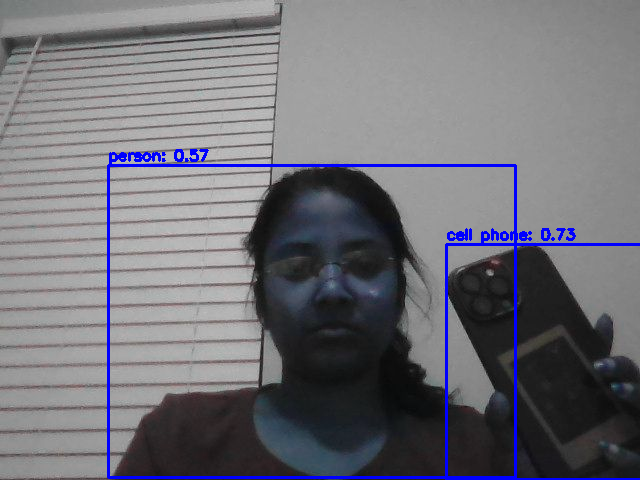

In [ ]:
for image_path in zip(photo_list,output_list):
  result_image = draw_boxes(image_path[0], image_path[1])
  cv2_imshow(result_image)
  print("\n")

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
# Testing the pretrained model on custom data from Kaggle

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

path = "https://www.kaggle.com/datasets/owaiskhan9654/car-person-v2-roboflow?select=Car-Person-v2-Roboflow-Owais-Ahmad"
od.download(path, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sathyalaharinuka
Your Kaggle Key: ··········


100%|██████████| 71.5M/71.5M [00:00<00:00, 130MB/s]


In [ ]:
import pandas as pd

import os

annotations = "/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/labels"
custom_data = "/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images"
annotations_list = os.listdir(annotations)
custom_data_list = os.listdir(custom_data)

In [ ]:
epoch = 2;
epoch_results = []

In [ ]:
output_list_2 = []

from PIL import Image

for image_path in custom_data_list:
  image_path_new = custom_data+'/'+image_path
  image = Image.open(image_path_new)
  image_tensor = preprocess_image(image_path_new)
  outputs = model(image_tensor)[0]
  output_list_2.append(outputs)

In [ ]:
from yolov5.utils.general import non_max_suppression

output_list_3 = []
for i in range (epoch):
  print(i)
  output_list_3 = []
  for image_path in custom_data_list:
    # if( image_path!= '.ipynb_checkpoints'):
    image_path_new = custom_data+'/'+image_path
    image = Image.open(image_path_new)
    image_tensor = preprocess_image(image_path_new)
    outputs = model(image_tensor)
    outputs = non_max_suppression(outputs)[0]
    output_list_3.append(outputs)
  epoch_results.append(output_list_3)

0
1


In [ ]:
new_file_path_list = []
for i in custom_data_list:
  temp = custom_data+'/'+ i
  new_file_path_list.append(temp)
print(new_file_path_list)

['/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000001252_jpg.rf.2b998cd90ca4d0292d5b587b93e064ab.jpg', '/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000807_jpg.rf.849002f146dcdb22b31a4845f02c8024.jpg', '/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000260_jpg.rf.62e153d502ccb38873f1feca69704233.jpg', '/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000817_jpg.rf.f61168b5385919d7d3687216d7c55198.jpg', '/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000001155_jpg.rf.874d8da3bb04d5542b59e52567869f8c.jpg', '/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000001242_jpg.rf.33e5bc8dd3907174f6eae2980f0aacc1.jpg', '/content/yolov5/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000001729_jp

In [ ]:
result_image = []
for image_path in zip(new_file_path_list,output_list_3):
  # image_path_new = custom_data+'/'+image_path
  result_image.append(draw_boxes(image_path[0], image_path[1]))
  # cv2_imshow(result_image)

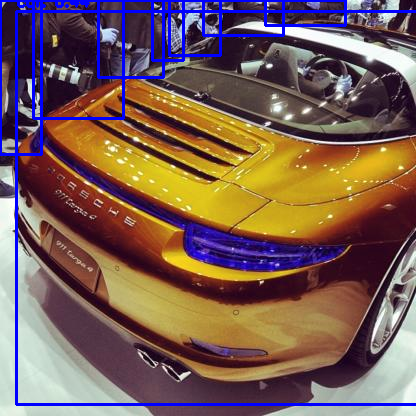

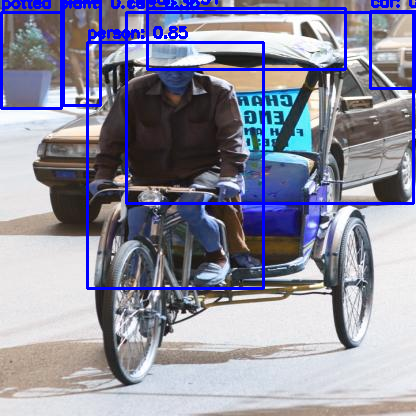

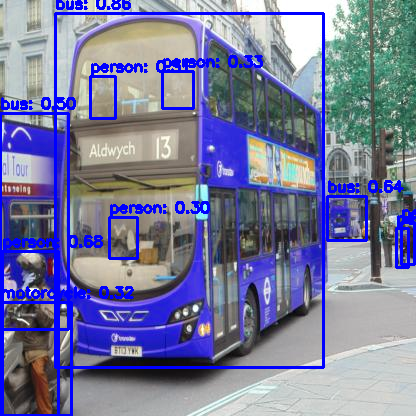

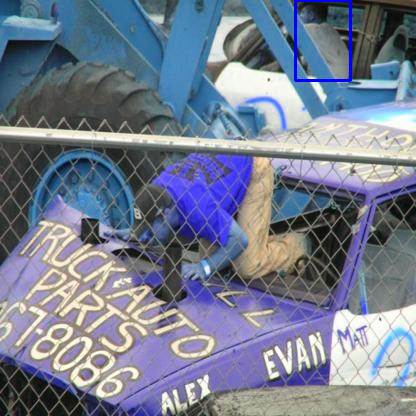

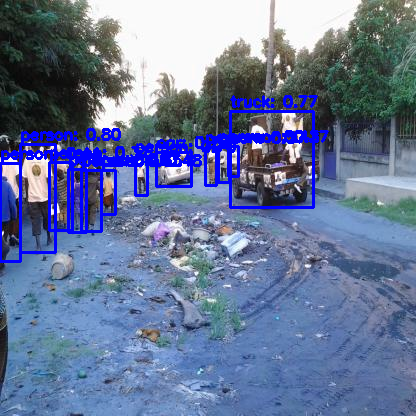

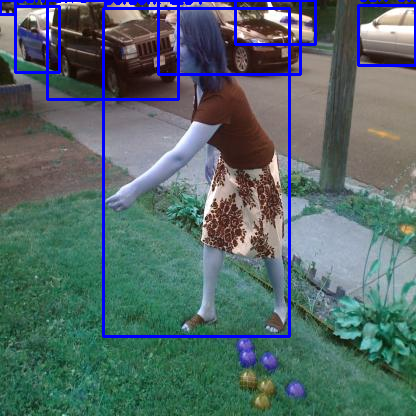

In [ ]:
import random

# Number of random images to select and display
num_random_images = 6

# Select random images
selected_image_files = random.sample(result_image, num_random_images)

# Display selected random images
for image_file in selected_image_files:
  cv2_imshow(image_file)
  print("\n")

In [ ]:
print(model.names.values())

dict_values(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'])


In [ ]:
scores = []
labels = []

for epoch in epoch_results:
  score_list = []
  label_list = []
  for box in epoch:
    for i in box:
      score, label = i[4].item(), model.names[i[5].item()]
      score_list.append(score)
      label_list.append(label)
  scores.append(score_list)
  labels.append(label_list)

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
# unique_elements = list(set(labels[0]))
# print(unique_elements)

my_dict = {}
unique_elements = []
score_label = zip(scores[0],labels[0])
score_labels = list(score_label)

for s_l in score_labels:
  if s_l[1] not in unique_elements:
    unique_elements.append(s_l[0])
    key = s_l[1]
    value = s_l[0]
    my_dict[key] = value
  else:
    key = s_l[1]
    value = my_dict[key]
    avg_value = (value, s_l[0]) / 2
    my_dict[key] = avg_value

print(my_dict)

{'car': 0.5014482736587524, 'person': 0.2571565508842468, 'truck': 0.3058054745197296, 'traffic light': 0.34981557726860046, 'train': 0.4027426838874817, 'bicycle': 0.26093193888664246, 'backpack': 0.2945924997329712, 'motorcycle': 0.48662668466567993, 'umbrella': 0.2668333351612091, 'handbag': 0.2607150971889496, 'bus': 0.3399374783039093, 'suitcase': 0.4758513867855072, 'surfboard': 0.8164124488830566, 'horse': 0.7421093583106995, 'skateboard': 0.8344572186470032, 'fire hydrant': 0.27417105436325073, 'dog': 0.5009731650352478, 'potted plant': 0.37061288952827454, 'chair': 0.28066596388816833, 'airplane': 0.28363168239593506, 'teddy bear': 0.3990972340106964, 'parking meter': 0.5056454539299011, 'stop sign': 0.7416995763778687, 'tie': 0.34344226121902466, 'bench': 0.4018174707889557, 'dining table': 0.42237210273742676, 'cell phone': 0.2820105254650116, 'book': 0.3127896785736084}


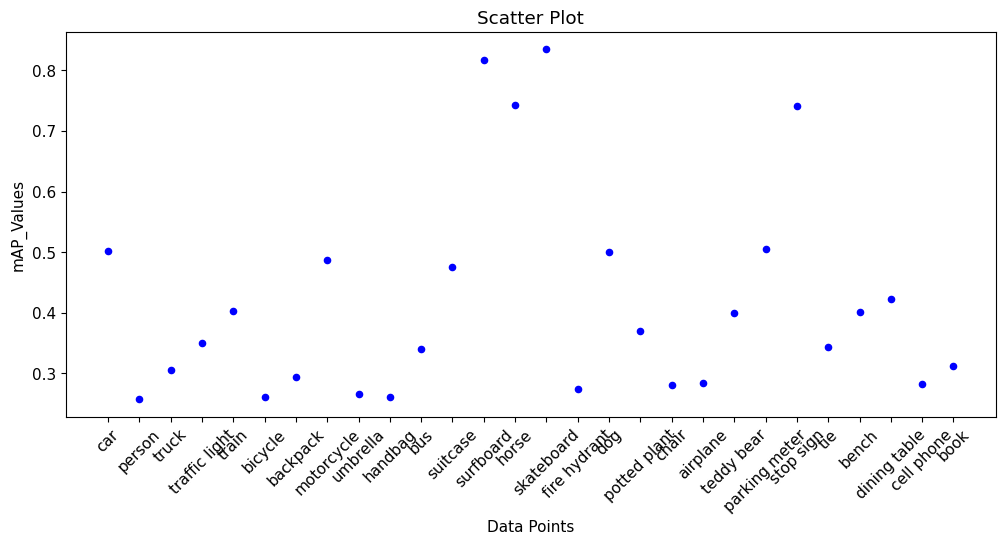

In [ ]:
# Extract x-axis (keys) and y-axis (values) data from the dictionary
x_values = list(my_dict.keys())
y_values = list(my_dict.values())

# Create a scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(x_values, y_values, color='blue', marker='o', s=20)
plt.xlabel('Data Points')
plt.ylabel('mAP_Values')
plt.title('Scatter Plot')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Kaggle dataset access :
# username - sathyalaharinuka
# password - 59604cf5b1c7b349865d2b55020922b5